#Importing the required libraries

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#import pandas to read the csv file
import pandas as pd
import numpy as np

In [ ]:
#Importing Libraries
import pickle 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,cohen_kappa_score,roc_auc_score

#Loading the data and converting into a dataframe

In [ ]:
#reading the y.txt file which contains labels
y = pd.read_csv('y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
y

,Complexity,Node Number,Language
0,O(1),nodes0,C
1,O(2n),nodes0,C
2,O(2n),nodes1,C
3,O(logN),nodes0,C
4,O(logN),nodes1,C
...,...,...,...
735,O(NlogN),nodes5,Java
736,O(NlogN),nodes6,Java
737,O(NlogN),nodes7,Java
738,O(NlogN),nodes8,Java


In [ ]:
x = np.load('x.npy')

In [ ]:
x

array([[-0.05468176,  0.127175  ,  0.0366478 , ...,  0.09731236,
        -0.107657  ,  0.08184043],
       [-0.0952346 ,  0.17503381,  0.06393544, ...,  0.1181241 ,
        -0.12556435,  0.13071893],
       [-0.13581266,  0.21943617,  0.10214286, ...,  0.1283566 ,
        -0.14471857,  0.19222681],
       ...,
       [ 0.18476942, -0.20165125, -0.23536444, ...,  0.23089787,
        -0.3212845 , -0.2662279 ],
       [ 0.25568134, -0.19382419, -0.3828221 , ...,  0.27317905,
        -0.33641592, -0.30042982],
       [ 0.78257215, -0.16311097, -0.7386889 , ...,  0.5125705 ,
        -0.17265631, -0.5655121 ]], dtype=float32)

In [ ]:
df = []
for i in range(len(x)):
  emb = x[i].tolist()
  # emb.append(y[i])
  df.append(emb)
col = []
for i in range(128):
  col.append('emb'+str(i+1))
# col.append('classes')
df = pd.DataFrame(df, columns=col)

In [ ]:
df

,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,emb10,...,emb119,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128
0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,0.116995,...,-0.125052,-0.049275,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840
1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,0.152739,...,-0.191601,-0.024092,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719
2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,0.182400,...,-0.259607,0.008541,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227
3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,-0.061681,...,-0.392645,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675
4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,0.019773,...,-0.449514,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,0.257494,...,-0.329598,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609
736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,0.159889,...,-0.263365,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131
737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,0.205073,...,-0.239681,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228
738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,0.150684,...,-0.323401,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430


In [ ]:
df_y = pd.read_csv('y.txt', sep = " ", header=None, names=["Complexity", "Node Number", "Language"])

In [ ]:
df['Complexity'] = df_y['Complexity']
df['Language']=df_y['Language']

In [ ]:
df.reset_index()

,index,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Complexity,Language
0,0,-0.054682,0.127175,0.036648,0.090353,0.192498,0.043540,-0.060334,-0.037632,-0.001838,...,-0.131080,0.002272,-0.017875,-0.209266,0.199226,0.097312,-0.107657,0.081840,O(1),C
1,1,-0.095235,0.175034,0.063935,0.117448,0.255929,0.064811,-0.072923,-0.032716,0.013575,...,-0.185713,-0.016963,-0.040366,-0.277818,0.261729,0.118124,-0.125564,0.130719,O(2n),C
2,2,-0.135813,0.219436,0.102143,0.135153,0.286394,0.068151,-0.078952,-0.003041,0.021949,...,-0.236532,-0.032249,-0.071049,-0.334604,0.334102,0.128357,-0.144719,0.192227,O(2n),C
3,3,0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,O(logN),C
4,4,0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,O(logN),C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,735,0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,...,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,O(NlogN),Java
736,736,0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,...,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,O(NlogN),Java
737,737,0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,...,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,O(NlogN),Java
738,738,0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,...,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,O(NlogN),Java


In [ ]:
df.columns

Index(['emb1', 'emb2', 'emb3', 'emb4', 'emb5', 'emb6', 'emb7', 'emb8', 'emb9',
       'emb10',
       ...
       'emb121', 'emb122', 'emb123', 'emb124', 'emb125', 'emb126', 'emb127',
       'emb128', 'Complexity', 'Language'],
      dtype='object', length=130)

In [ ]:
ind=df.set_index('Complexity')
df = ind.drop(["O(1)", "O(2n)", "O(N!)","O(sqrt(N))"])

In [ ]:
df=df.reset_index()

In [ ]:
df

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb120,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language
0,O(logN),0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.586666,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,C
1,O(logN),0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.386576,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,C
2,O(logN),0.099151,0.171953,-0.230760,0.147983,0.240728,0.211076,-0.085177,-0.008800,-0.065532,...,-0.348318,-0.186028,-0.086344,-0.106616,-0.450628,0.463381,0.325981,-0.107556,0.129127,C
3,O(logN),0.004622,0.254111,0.043829,0.140978,0.663985,0.359904,-0.219945,0.108162,-0.140120,...,-0.262810,-0.185516,-0.029431,-0.201144,-0.293320,0.295109,0.290326,-0.353395,0.164944,C
4,O(logN),-0.013093,0.067878,-0.087897,0.155157,0.046141,0.043758,-0.005407,-0.022934,0.036307,...,-0.180832,-0.147306,-0.039465,-0.092333,-0.350462,0.329363,0.250614,-0.131446,0.113169,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,O(NlogN),0.162677,-0.179751,-0.320467,0.374476,0.487395,-0.065953,-0.380204,-0.143154,-0.065873,...,-0.397525,0.117815,0.099337,-0.094519,-0.544291,0.213452,0.262748,-0.306325,-0.224609,Java
716,O(NlogN),0.183020,-0.166014,-0.231057,0.452174,0.562882,-0.138434,-0.443576,-0.284463,-0.054835,...,-0.445122,0.000230,0.095979,-0.063981,-0.603873,0.114075,0.222806,-0.317638,-0.290131,Java
717,O(NlogN),0.184769,-0.201651,-0.235364,0.446800,0.547860,-0.155865,-0.472018,-0.309393,-0.079808,...,-0.489142,-0.006414,0.128634,-0.109084,-0.605826,0.106701,0.230898,-0.321285,-0.266228,Java
718,O(NlogN),0.255681,-0.193824,-0.382822,0.447094,0.499922,-0.083941,-0.402473,-0.251599,-0.028515,...,-0.498780,0.046986,0.124914,-0.117825,-0.633948,0.106924,0.273179,-0.336416,-0.300430,Java


In [ ]:
df['Language'].value_counts()

Java      307
Python    299
C         114
Name: Language, dtype: int64

In [ ]:
#Combine language and the complexity into a single label
df['Target'] = df['Language']+'_'+ df['Complexity']

In [ ]:
df["Target"]

0          C_O(logN)
1          C_O(logN)
2          C_O(logN)
3          C_O(logN)
4          C_O(logN)
           ...      
715    Java_O(NlogN)
716    Java_O(NlogN)
717    Java_O(NlogN)
718    Java_O(NlogN)
719    Java_O(NlogN)
Name: Target, Length: 720, dtype: object

In [ ]:
df['Target'].value_counts()

Java_O(N)          165
Python_O(N)        149
Python_O(N2)        74
Java_O(N2)          65
C_O(N)              61
Java_O(NlogN)       47
Python_O(NlogN)     42
C_O(N2)             26
Python_O(logN)      14
Java_O(N3)          11
C_O(NlogN)          11
Java_O(logN)        10
Python_O(N3)        10
Python_O(Nd)        10
Java_O(Nd)           9
C_O(logN)            7
C_O(N3)              6
C_O(Nd)              3
Name: Target, dtype: int64

In [ ]:
df.head()

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb121,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language,Target
0,O(logN),0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.216605,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,C,C_O(logN)
1,O(logN),0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.253997,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,C,C_O(logN)
2,O(logN),0.099151,0.171953,-0.230760,0.147983,0.240728,0.211076,-0.085177,-0.008800,-0.065532,...,-0.186028,-0.086344,-0.106616,-0.450628,0.463381,0.325981,-0.107556,0.129127,C,C_O(logN)
3,O(logN),0.004622,0.254111,0.043829,0.140978,0.663985,0.359904,-0.219945,0.108162,-0.140120,...,-0.185516,-0.029431,-0.201144,-0.293320,0.295109,0.290326,-0.353395,0.164944,C,C_O(logN)
4,O(logN),-0.013093,0.067878,-0.087897,0.155157,0.046141,0.043758,-0.005407,-0.022934,0.036307,...,-0.147306,-0.039465,-0.092333,-0.350462,0.329363,0.250614,-0.131446,0.113169,C,C_O(logN)


#Oversampling data

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
mapping=dict()
labels = list(df['Target'].unique())
for i in range(len(labels)):
   mapping[labels[i]]=i

In [ ]:
mapping

{'C_O(logN)': 0,
 'C_O(N)': 1,
 'C_O(N2)': 2,
 'C_O(N3)': 3,
 'C_O(Nd)': 4,
 'C_O(NlogN)': 5,
 'Python_O(logN)': 6,
 'Python_O(N)': 7,
 'Python_O(N2)': 8,
 'Python_O(N3)': 9,
 'Python_O(Nd)': 10,
 'Python_O(NlogN)': 11,
 'Java_O(logN)': 12,
 'Java_O(N)': 13,
 'Java_O(N2)': 14,
 'Java_O(N3)': 15,
 'Java_O(Nd)': 16,
 'Java_O(NlogN)': 17}

In [ ]:
df['mapping']=df['Target'].replace(mapping)

In [ ]:
df.head()

,Complexity,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb122,emb123,emb124,emb125,emb126,emb127,emb128,Language,Target,mapping
0,O(logN),0.270222,0.300358,-0.445603,0.196632,0.531115,0.433794,-0.261992,-0.074271,-0.215854,...,-0.092687,-0.081682,-0.599847,0.550452,0.468392,-0.247837,0.087675,C,C_O(logN),0
1,O(logN),0.102710,0.177498,-0.326135,0.302662,0.256015,0.207272,-0.175998,-0.057321,0.000238,...,-0.026445,-0.061492,-0.581163,0.442037,0.418021,-0.194271,0.098900,C,C_O(logN),0
2,O(logN),0.099151,0.171953,-0.230760,0.147983,0.240728,0.211076,-0.085177,-0.008800,-0.065532,...,-0.086344,-0.106616,-0.450628,0.463381,0.325981,-0.107556,0.129127,C,C_O(logN),0
3,O(logN),0.004622,0.254111,0.043829,0.140978,0.663985,0.359904,-0.219945,0.108162,-0.140120,...,-0.029431,-0.201144,-0.293320,0.295109,0.290326,-0.353395,0.164944,C,C_O(logN),0
4,O(logN),-0.013093,0.067878,-0.087897,0.155157,0.046141,0.043758,-0.005407,-0.022934,0.036307,...,-0.039465,-0.092333,-0.350462,0.329363,0.250614,-0.131446,0.113169,C,C_O(logN),0


In [ ]:
df['mapping'].value_counts()

13    165
7     149
8      74
14     65
1      61
17     47
11     42
2      26
6      14
15     11
5      11
12     10
9      10
10     10
16      9
0       7
3       6
4       3
Name: mapping, dtype: int64

In [ ]:
X, y = df.iloc[:, 1:129], df['mapping']

In [ ]:
# transform the dataset
oversample = SMOTE(k_neighbors=2)
X, y = oversample.fit_resample(X, y)

Class=0, n=165 (5.556%)
Class=1, n=165 (5.556%)
Class=2, n=165 (5.556%)
Class=3, n=165 (5.556%)
Class=4, n=165 (5.556%)
Class=5, n=165 (5.556%)
Class=6, n=165 (5.556%)
Class=7, n=165 (5.556%)
Class=8, n=165 (5.556%)
Class=9, n=165 (5.556%)
Class=10, n=165 (5.556%)
Class=11, n=165 (5.556%)
Class=12, n=165 (5.556%)
Class=13, n=165 (5.556%)
Class=14, n=165 (5.556%)
Class=15, n=165 (5.556%)
Class=16, n=165 (5.556%)
Class=17, n=165 (5.556%)


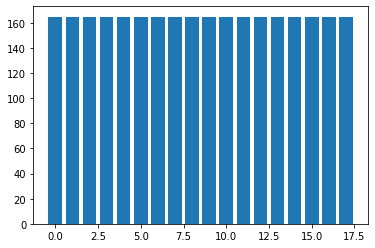

In [ ]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

#Train Test split and standardizing the data

In [ ]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_results = pd.DataFrame()
model_results['models'] = ['Random Forest','Adaboost','XGBoost','KNN','Logistic Regression','Naive Bayes']
acc = []
prec = []
rec = []
f1 = []
kap = []
roc = []

# Random forest

In [ ]:
from sklearn.model_selection import GridSearchCV
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,10))}]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'max_depth': 14, 'max_features': 9}
0.9483678746010584


In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42,max_depth=14,max_features=9)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, max_features=9,
                       n_estimators=10, random_state=42)

In [ ]:
num_classes = len(set(df['Target']))
num_classes

18

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0, 40,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  2, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  1,  2,  1,  3,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  4, 34,  0,  1,  5,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1,  0, 43,  0,  0,  0,  0,  0,
         0,  0],
       [ 0,  0,  0,  

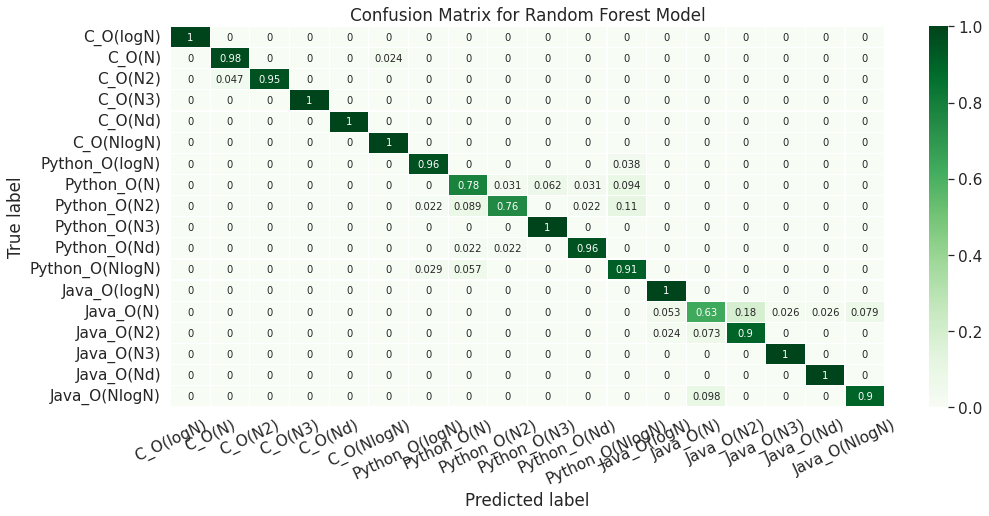

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = labels
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9327052489905787

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      0.98      0.96        41
           2       1.00      0.95      0.98        43
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        43
           5       0.98      1.00      0.99        46
           6       0.96      0.96      0.96        53
           7       0.78      0.78      0.78        32
           8       0.94      0.76      0.84        45
           9       0.94      1.00      0.97        34
          10       0.96      0.96      0.96        45
          11       0.76      0.91      0.83        35
          12       0.94      1.00      0.97        45
          13       0.77      0.63      0.70        38
          14       0.84      0.90      0.87        41
          15       0.98      1.00      0.99        44
          16       0.97      1.00      0.99        38
          17       0.93    

In [ ]:
X_train.shape

(2227, 128)

In [ ]:
y_train.shape

(2227,)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.27%


In [ ]:
#from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
#from sklearn import metrics
labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
#print("Kappa score:" + cohen_kappa_score(y_test, y_pred,average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      0.98      0.96        41
           2       1.00      0.95      0.98        43
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        43
           5       0.98      1.00      0.99        46
           6       0.96      0.96      0.96        53
           7       0.78      0.78      0.78        32
           8       0.94      0.76      0.84        45
           9       0.94      1.00      0.97        34
          10       0.96      0.96      0.96        45
          11       0.76      0.91      0.83        35
          12       0.94      1.00      0.97        45
          13       0.77      0.63      0.70        38
          14       0.84      0.90      0.87        41
          15       0.98      1.00      0.99        44
          16       0.97      1.00      0.99        38
          17       0.93    

In [ ]:
#from sklearn.metrics import roc_auc_score
y_prob = classifier.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.994528754948592

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
import pickle 
file = open('scaler_lang.pkl', 'wb')

# dump information to that file
pickle.dump(scaler, file)

In [ ]:
import pickle 
file = open('rf_lang.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)

# Adaboost

In [ ]:
from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

In [ ]:
bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.5, n_estimators=300)

In [ ]:
y_pred = bdt_real.predict(X_test) 
y_pred1 = bdt_discrete.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1,average='weighted'))
print(recall_score(y_test, y_pred1,average='weighted'))
print(f1_score(y_test, y_pred1,average='weighted'))
#print(cohen_kappa_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.79      0.83      0.81        41
           2       0.70      0.91      0.79        43
           3       1.00      0.89      0.94        37
           4       1.00      0.95      0.98        43
           5       0.98      0.89      0.93        46
           6       1.00      0.70      0.82        53
           7       0.47      0.66      0.55        32
           8       0.33      0.58      0.42        45
           9       0.88      0.65      0.75        34
          10       0.97      0.62      0.76        45
          11       0.43      0.37      0.40        35
          12       0.96      0.96      0.96        45
          13       0.38      0.66      0.48        38
          14       0.62      0.61      0.62        41
          15       0.89      0.77      0.83        44
          16       1.00      0.47      0.64        38
          17       0.78    

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = bdt_real.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9511729399087798

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
import pickle 
file = open('adboost_lang.pkl', 'wb')

# dump information to that file
pickle.dump(bdt_real, file)

# XGBoost

In [ ]:
import xgboost as xgb

from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder 

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1, 0.01, 0.05]
        }
model = XGBClassifier() 
grid_search = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 3,
    verbose=True
)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)


In [ ]:
'''
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
'''

In [ ]:
model = XGBClassifier() 
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.02%


In [ ]:
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,cohen_kappa_score
from sklearn import metrics
#labels=['0','1','2','3','4']
print(classification_report(y_test, y_pred))
print(precision_score(y_test, predictions,average='weighted'))
print(recall_score(y_test, predictions,average='weighted'))
print(f1_score(y_test, predictions,average='weighted'))
print(cohen_kappa_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.95      0.97        41
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        43
           5       1.00      1.00      1.00        46
           6       0.96      1.00      0.98        53
           7       0.90      0.84      0.87        32
           8       0.97      0.76      0.85        45
           9       0.97      1.00      0.99        34
          10       0.98      0.98      0.98        45
          11       0.77      0.97      0.86        35
          12       0.90      1.00      0.95        45
          13       1.00      0.71      0.83        38
          14       0.86      0.93      0.89        41
          15       1.00      1.00      1.00        44
          16       0.90      1.00      0.95        38
          17       0.95    

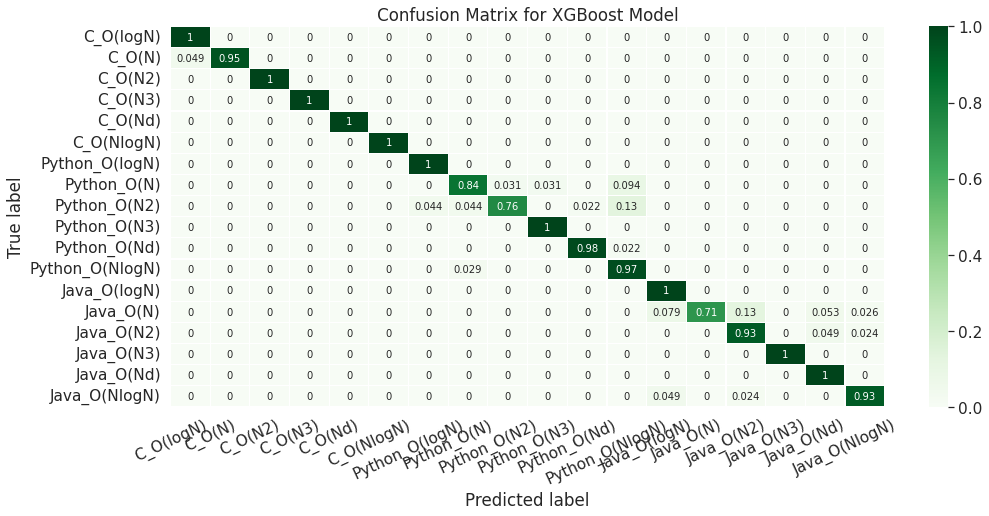

In [ ]:
# Get and reshape confusion matrix data
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = labels
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.99807053045206

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
roc

[0.994528754948592, 0.9511729399087798, 0.9981503457898613]

In [ ]:
import pickle 
file = open('xgboost_lang.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
y_pred=knn_clf.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.97      0.85      0.91        41
           2       0.95      0.95      0.95        43
           3       0.97      1.00      0.99        37
           4       0.93      1.00      0.97        43
           5       0.96      0.98      0.97        46
           6       0.93      1.00      0.96        53
           7       0.91      0.66      0.76        32
           8       0.83      0.64      0.73        45
           9       0.87      1.00      0.93        34
          10       0.92      1.00      0.96        45
          11       0.71      0.83      0.76        35
          12       0.83      1.00      0.91        45
          13       0.89      0.42      0.57        38
          14       0.71      0.73      0.72        41
          15       0.88      1.00      0.94        44
          16       0.93      1.00      0.96        38
    

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = knn_clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9860614950166346

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
import pickle 
file = open('knn_lang.pkl', 'wb')

# dump information to that file
pickle.dump(knn_clf, file)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,multi_class="multinomial", max_iter=1500)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1500, multi_class='multinomial', random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
y_pred 

array([ 6,  5, 13,  5, 14,  4,  2, 11, 10,  4, 11,  7, 17,  5,  0,  4, 13,
       12,  4,  9,  6, 14,  9,  5,  0, 12, 17,  1, 15,  8,  4,  5,  5, 15,
       14, 11,  3, 17, 11,  5,  4, 15,  5,  5,  1, 15, 15,  4, 12, 13,  9,
        2,  3, 17,  5, 15,  8, 14, 12,  7, 17,  5,  8, 11,  2,  6,  2,  0,
        0, 17, 16, 16,  7,  0,  5,  2, 14, 12,  8,  7,  5, 11, 10,  9,  6,
        2,  3,  0, 17,  4,  8,  3,  3, 12,  1, 16,  6,  8,  5, 11, 13,  6,
        4,  2, 15, 15,  3,  2, 10,  0,  0,  7,  2,  4, 16,  6, 12,  6,  1,
       13, 12, 14,  2, 16, 16,  3,  0,  5,  7,  2,  0, 15,  7,  6,  2, 15,
       14,  4,  9, 14, 11,  4, 13, 12, 14, 15,  8, 12,  4,  2,  5,  5,  9,
        5,  3, 16,  8,  9, 13, 15,  4, 15, 15, 12,  0, 14,  6,  0,  6, 12,
        4,  2,  2,  1, 10,  8, 14,  6,  4, 11,  1, 10, 14,  4, 10, 12, 11,
        6,  2, 10, 15, 15,  1,  9,  1, 12,  4, 17, 12,  1, 17, 11, 16,  4,
        8,  7, 10,  6, 10, 17,  4,  0,  8, 11,  6,  8, 17,  8,  7,  8, 11,
        5,  5,  5,  8, 11

In [ ]:
#from sklearn.metrics import accuracy_score,confusion_matrix
#from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.93      0.96        41
           2       0.98      0.95      0.96        43
           3       1.00      1.00      1.00        37
           4       0.93      1.00      0.97        43
           5       0.96      0.98      0.97        46
           6       0.95      1.00      0.97        53
           7       0.86      0.78      0.82        32
           8       0.86      0.69      0.77        45
           9       0.86      0.91      0.89        34
          10       0.93      0.91      0.92        45
          11       0.77      0.94      0.85        35
          12       0.94      1.00      0.97        45
          13       0.86      0.50      0.63        38
          14       0.82      0.88      0.85        41
          15       0.96      1.00      0.98        44
          16       0.86      1.00      0.93        38
    

In [ ]:
#from sklearn.metrics import roc_auc_score
y_prob = clf.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9945238023480044

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
import pickle 
file = open('log_reg_lang.pkl', 'wb')

# dump information to that file
pickle.dump(clf, file)

# Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
p = Pipeline([('Normalizing',MinMaxScaler()),('MultinomialNB',MultinomialNB())])
p.fit(X_train,y_train) 

Pipeline(steps=[('Normalizing', MinMaxScaler()),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
y_pred = p.predict(X_test)
y_pred 

array([ 6,  5, 16,  5, 17,  4,  4, 11,  7,  4, 11,  7, 14,  5,  0,  4, 13,
       12,  4,  9,  6, 13,  9,  5,  0, 16, 14,  2, 15,  7,  4,  3,  5, 15,
       17, 11,  3, 17,  9,  5,  4, 15,  5,  5,  1, 15, 15,  4, 12, 16,  9,
        1,  3, 12,  5, 16, 11, 17, 12,  7, 12,  5, 11, 11,  5,  6,  2,  2,
        0, 17, 16, 16,  7,  0,  5,  1, 14, 12, 11,  9,  5,  9,  7,  9,  6,
        5,  3,  0, 17,  4,  9,  3,  3, 12,  4, 16,  6, 11,  5, 11, 13,  7,
        4,  4, 15, 15,  4,  4,  7,  0,  0, 10,  4,  4, 16,  6, 12,  7,  4,
       13, 12, 15,  2, 16, 16,  3,  2,  5,  7,  0,  0, 16,  7,  6,  4, 15,
       14,  4,  9, 15, 11,  4, 13, 12, 16, 14,  8, 12,  4,  1,  5,  5,  9,
        5,  3, 16,  8, 11, 14, 16,  4, 16, 15, 17,  0, 14,  7,  0,  6, 12,
        4,  1,  2,  1,  9,  9, 15,  6,  4, 11,  1,  9, 16,  4,  9, 12,  7,
        7,  4, 11, 15, 15,  4,  9,  1, 12,  4, 17, 12,  5, 16,  7, 16,  4,
        9,  7,  7,  6, 11, 16,  4,  0, 11,  7,  7,  9, 17,  7,  7,  9, 11,
        5,  5,  5,  9, 11

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)
print(precision_score(y_test, y_pred,average='weighted'))
print(recall_score(y_test, y_pred,average='weighted'))
print(f1_score(y_test, y_pred,average='weighted'))
print(cohen_kappa_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.77      0.49      0.60        41
           2       0.50      0.23      0.32        43
           3       0.91      0.81      0.86        37
           4       0.51      0.98      0.67        43
           5       0.80      0.89      0.85        46
           6       0.88      0.68      0.77        53
           7       0.35      0.78      0.49        32
           8       1.00      0.04      0.09        45
           9       0.34      0.85      0.48        34
          10       0.00      0.00      0.00        45
          11       0.33      0.40      0.36        35
          12       0.82      0.73      0.78        45
          13       0.46      0.34      0.39        38
          14       0.29      0.22      0.25        41
          15       0.67      0.70      0.69        44
          16       0.42      0.74      0.53        38
    

In [ ]:
from sklearn.metrics import roc_auc_score
y_prob = p.predict_proba(X_test)
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
weighted_roc_auc_ovo

0.9545263856123984

In [ ]:
acc.append(accuracy_score(y_test, y_pred))
prec.append(precision_score(y_test, y_pred,average='weighted'))
rec.append(recall_score(y_test, y_pred,average='weighted'))
f1.append(f1_score(y_test, y_pred,average='weighted'))
kap.append(cohen_kappa_score(y_test, y_pred))
roc.append(weighted_roc_auc_ovo)

In [ ]:
import pickle 
file = open('nb_lang.pkl', 'wb')

# dump information to that file
pickle.dump(p, file)

##Plotting the results

In [ ]:
model_results['Accuracy'] = acc
model_results['Precision'] = prec
model_results['Recall'] = rec
model_results['F1'] = f1
model_results['Kappa'] = kap
model_results['ROC_AUC'] = roc

In [ ]:
model_results

,models,Accuracy,Precision,Recall,F1,Kappa,ROC_AUC
0,Random Forest,0.932705,0.933249,0.932705,0.931417,0.928695,0.994529
1,Adaboost,0.488560,0.642289,0.488560,0.478376,0.458082,0.951173
2,XGBoost,0.944818,0.945559,0.944818,0.944428,0.941529,0.998150
3,KNN,0.889637,0.891422,0.889637,0.882971,0.883015,0.986061
4,Logistic Regression,0.912517,0.913275,0.912517,0.908650,0.907290,0.994524
5,Naive Bayes,0.559892,0.593931,0.559892,0.528392,0.534728,0.954526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


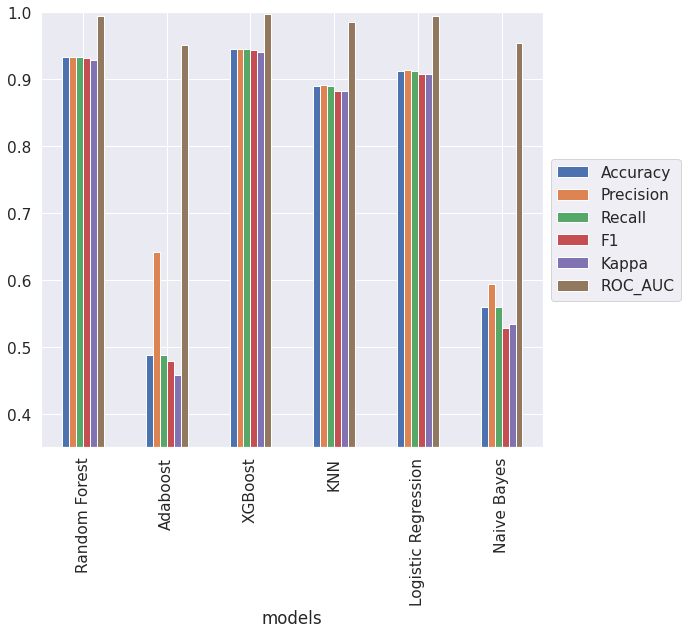

In [ ]:
fig = model_results.plot(x = "models", y = ['Accuracy',	'Precision',	'Recall',	'F1',	'Kappa', 'ROC_AUC'], kind = "bar", figsize=(9, 8))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylim([0.35,1])
plt.show()